# Micromagnetic Simulation Tool

## Learning objectives
This tutorial has the following objectives
1. get you familier with the energy terms in the micromagnetic model.

2. understand how to run the Monte Carlo simulation.

### Import packages
You need to import the packages at the very beginning.

In [2]:
# external pacakges that we need 
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc
import numpy as np
# my own package
from continuous_model import *

### Material parameters
You need to define several parameters. The material specific interactions (and parameters) can now be added to the simulation object. Let’s first specify the material specific parameters:

In [3]:
Ms = 3.84e5
mu0 = 4 * np.pi * 1e-7
A = 8.78e-12
D = 1.58e-3
B = 0.1

### Geometry information
We pass those parameters to a finite-difference mesh. Here I created a discretised mesh. There are 5 cells in the x direction, 5 cells in the y direction and 5 cells in the z direction. the cell is isotopic, meaning that dx = dy = dz = 1 * units, in which unit $= 5 \times 10^{-9}$.

In [4]:
my_cool_mesh = RectangularMesh(1, 1, 1, 5, 5, 5)

If you want to view the finite-different mesh that you've just created, you can use plot mesh function which is a actually
a wrapper of k3d() function or mpl() function from ubermag.
if mode = 0 using k3d.voxels, if mode = 1 using matplotlib.

In [5]:
plot_mesh(my_cool_mesh, mode=0)

Output()

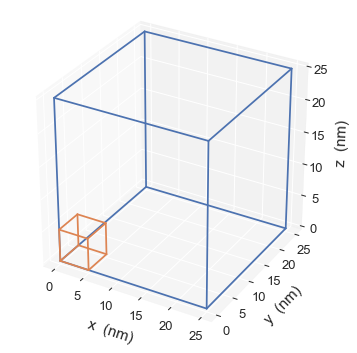

In [6]:
plot_mesh(my_cool_mesh, mode=1)

### Initial magnetisation conﬁguration
Initial magnetisation conﬁguration will then be passed to a magnetisation field.
If you have prepared $\textbf{m}$, you can use to load a initial magnetisation conﬁguration. 

we prepared several random magnetisation conﬁgurations in the $\mathbf{normalised\_m}$ folder.
1. m_131.npy ----> size(1, 3, 1, 3)
2. m_222.npy ----> size(2, 2, 2, 3)
3. m_555.npy ----> size(5, 5, 5, 3)
4. m_1052.npy ----> size(10, 5, 2, 3)
5. m_30302.npy ----> size(30, 30, 2, 3)

helical conﬁguration
1. m_is_skyrmion ----> size(30, 30, 2, 3)

In [7]:
unknow_state = np.load('./normalised_m/m_is_skyrmion.npy')
print(unknow_state.shape)

(30, 30, 2, 3)


In [20]:
initial_state_1 = np.load('./normalised_m/m_555.npy')

If you want to use a scalar unit vector field $\textbf{m}$ (Elements all eual to a vector), you can call scalarMagnetisation_field function.

For example, Here I pass the mesh I've created and (0, 0, 1) to scalarMagnetisation_field.

In [17]:
initial_state_2 = scalarMagnetisation_field(my_cool_mesh, (0, 0, 1))

Or if you want to use a random unit vector field you can use randomMagnetisation_field function.

For example, Here I pass the mesh I've created and (0, 0, 1) to randomMagnetisation_field.


In [18]:
initial_state_3 = randomMagnetisation_field(my_cool_mesh)

We pass initial magnetisation conﬁguration and discretiesed mesh to create a magnetisation field object

In [21]:
my_cool_m = m_Field(my_cool_mesh, Ms, initial_state_1)

If you want to take a look at the initial magnetisation field. Here I plotted the xy magnetization vector field through the sample (25e-9 from the bottom of the sample).

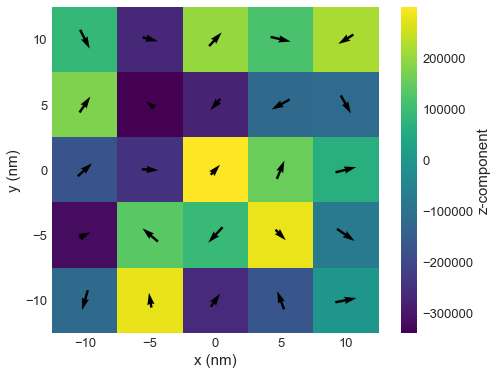

In [22]:
plot_field(my_cool_mesh, my_cool_m, 'z', value=25e-9)

If you want to calculate the initial energy of the system.

In [24]:
initial_E = Exchange(A=A).energy(my_cool_m) + DMI(D=D).energy(my_cool_m) + Zeeman(H=[0, 0, B/mu0]).energy(my_cool_m)
print(initial_E)

2.6688719261732253e-17


### Energy terms
This package now support exchange energy term, dmi energy term, Uniaxial anisotropy energy term and Zeeman energy term. Let try to use exchange energy term for a example
Zeeman energy term.

if you want to calculate the effective field for the Exchange energy in the initial magnetisaiton state.

In [25]:
exchange_Heff = Exchange(A=A).effective_field(my_cool_m)
print(exchange_Heff)

[[[[-5249384.83774874 -1195268.2691042  -1112423.2446056 ]
   [ 5017060.38627782 -2499540.81375837  6259846.35094716]
   [-3750586.267802   -7648018.14959535 -3235251.54515153]
   [-3819360.8329489   5824389.71124063   737821.33962169]
   [ 2405165.66233922  4100797.529292     816465.01722716]]

  [[ 6495395.68263413  -884709.27821308  -985713.25544479]
   [-5343190.49202933  5162863.83702134 -2156335.93392897]
   [ 1484451.20435463  5964641.76002575  3830961.72132525]
   [ 4864120.91971277 -1326530.61655805  4343348.86420999]
   [-4184435.26774405 -1002519.95265565  2971257.73877487]]

  [[ 1497697.15999249  5161983.0250846   3450637.97979349]
   [-6072597.44083076 -5160844.85510774  -943005.65263621]
   [ 4148101.45897443 -4966071.17930364 -2704382.16408968]
   [ -502825.94565174 -3765660.42397652  3147156.13177501]
   [-1177488.12473207  -987686.77535069   243325.86943522]]

  [[ 1787133.34552554   810206.17889251  4301770.12527992]
   [ 4885339.3668597   -376592.1764837  -4223780.1

if you want to calculate the energy density of the exchange energy in the micromagnetic model.

In [26]:
w_exchange = Exchange(A=A).energy_density(my_cool_m)
print(w_exchange)

[[[[1229329.97325833]
   [1814299.47554143]
   [2160293.06524177]
   [1663079.69457711]
   [1118130.56649004]]

  [[1458261.43052735]
   [1727808.75584859]
   [1744298.82659137]
   [1496758.00862677]
   [1166512.98978961]]

  [[1450459.82640142]
   [1880254.91312539]
   [1686635.69870498]
   [1189209.15048648]
   [ 357819.11460968]]

  [[1040827.44829506]
   [1340758.52046014]
   [1105224.92917652]
   [1973500.08225977]
   [1580666.81007771]]

  [[ 944891.73965227]
   [ 588096.58528645]
   [1435349.62143296]
   [ 789076.19152865]
   [ 721182.90378345]]]


 [[[1503804.40609186]
   [1772647.645017  ]
   [1296269.64579163]
   [1823655.20585744]
   [1172405.211308  ]]

  [[2208539.99179624]
   [1824648.56358563]
   [ 971477.8384162 ]
   [2489731.810923  ]
   [1868790.32981336]]

  [[1759687.93667309]
   [2029809.97792028]
   [2330562.0142758 ]
   [1938581.53173415]
   [1621188.24045239]]

  [[ 953424.87318321]
   [2225548.46265686]
   [2777442.70254207]
   [1930205.94704618]
   [1192550.56

if you want to calculate exchange energy in the micromagnetic model.

In [29]:
exchange_energy = Exchange(A=A).energy(my_cool_m)
print("The exchange energy in the initial magnetisation state : ", exchange_energy)

The exchange energy in the initial magnetisation state :  2.6184662451059414e-17


### Monte Carlo simulation
We implement Monte Carlo simulation to find this model's 'relaxed' state at a specific temperature , first we call 
the Simulator class to initialise a simulator. Due to we the system we defined contains Exchange energy, DMI energy, ZeemanHere I pass A, D, H and T = 0 to the simulator class.

In [30]:
# initialise a simulator
my_cool_simulator = Simulator(A, D, [0, 0, B/mu0], 0, 0, 0)

You need to pass magnetisation field, absolute tolerance for $\mathbf{m} \times \mathbf{H}_{\text {eff }}$ and maximum Monte carlo steps to  compute_minimum to 'relax' the system.

In [31]:
m_final, E_final = my_cool_simulator.compute_minimum(my_cool_m, 0.1, 4000000)

K, u are ignored


In [33]:
print("The total energy of the system in the final magnetisation state : ", E_final)

The total energy of the system  in the final magnetisation state :  -1.956078867015935e-18


In [34]:
print("The final magnetisation state : \n", m_final)
print(m_final)

The final magnetisation state : 
 [[[[-3.16909405e-01  7.37591026e-01  5.96261610e-01]
   [-4.83705019e-01  6.57036453e-01  5.78214972e-01]
   [-5.80073134e-01  5.77400314e-01  5.74564215e-01]
   [-6.58843209e-01  4.80437961e-01  5.78882536e-01]
   [-7.38171724e-01  3.13398714e-01  5.97397482e-01]]

  [[-7.10813554e-02  6.59898541e-01  7.47984864e-01]
   [-2.19318014e-01  6.31288081e-01  7.43891771e-01]
   [-3.08316998e-01  5.86545613e-01  7.48935827e-01]
   [-3.85836231e-01  5.26652970e-01  7.57474126e-01]
   [-4.77837830e-01  4.14612580e-01  7.74446523e-01]]

  [[ 2.01343249e-01  5.44147680e-01  8.14471730e-01]
   [ 8.24678578e-02  5.85898170e-01  8.06177640e-01]
   [ 1.60907288e-03  5.93507306e-01  8.04826993e-01]
   [-7.96296120e-02  5.86880059e-01  8.05748672e-01]
   [-1.99106250e-01  5.46003553e-01  8.13779344e-01]]

  [[ 4.79964896e-01  4.12554461e-01  7.74230273e-01]
   [ 3.88513584e-01  5.25323045e-01  7.57028991e-01]
   [ 3.11291558e-01  5.86172802e-01  7.47996666e-01]
   [ 2

If you want to take a look at the final magnetisation field. Here I plotted the xy magnetization vector field through the sample (25e-9 from the bottom of the sample).

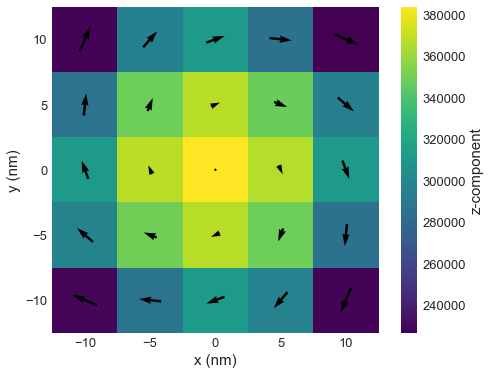

In [35]:
plot_field(my_cool_mesh, my_cool_m, 'z', value=25e-9)

### Validation
You can also validate the result you just get with a existing python package called Ubermag.

In [37]:
# create region and mesh
region = df.Region(p1=(0, 0, 0), p2=(25e-9, 25e-9, 25e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

# pass mesh to magnetisation feild
m = df.Field(mesh, dim=3, value=initial_state_1  , norm=Ms)

# named a system 
system = mm.System(name='tutorial')
system.m = m
system.energy = (mm.Exchange(A=A) + 
                 mm.Zeeman(H=[0, 0, B / mu0]) + 
                 mm.DMI(D=D, crystalclass='T')
                )


# compute the initial energy of the system
E = oc.compute(system.energy.energy, system)

print("Initial energy of the system:", E)
# 'drive' the system to its lowest energy state
md = oc.MinDriver()
md.drive(system)

# calculate the energy of the lowest eneegy state
E_new = oc.compute(system.energy.energy, system)
print("Final energy of the system:", E_new)

Running OOMMF (ExeOOMMFRunner)[2022/09/07 00:15]... (1.7 s)
Initial energy of the system: 2.66887192617e-17
Running OOMMF (ExeOOMMFRunner)[2022/09/07 00:15]... (1.6 s)
Running OOMMF (ExeOOMMFRunner)[2022/09/07 00:15]... (1.6 s)
Final energy of the system: -1.95608323296e-18


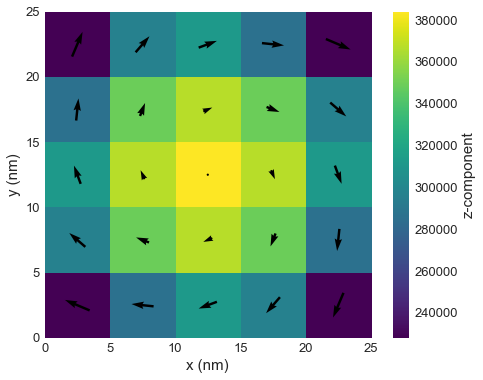

In [38]:
m.plane(z=25e-9).mpl() # ubermag

In [39]:
m_uber_final = system.m.array / Ms

if you want to compare our final state from our program and ubermag.

In [40]:
np.allclose(m_final, m_uber_final, atol=0.01)

True